In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [2]:
image_dir = '../images'
merfish_dir = f'{image_dir}/u2os'

model_dir = './models'

In [3]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

# 5 Images

In [4]:
# Load 5 images model from disk
add5_model = StarDist2D(None, name='2D_versatile_fluo_5', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.654566, nms_thresh=0.3.


In [5]:
add5_Y_pred = [add5_model.predict_instances(x, n_tiles=add5_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [03:04<00:00, 23.12s/it]


In [6]:
add5_Y_pred_labels = [pred[0] for pred in add5_Y_pred]
add5_stats = [matching_dataset(merfish_Y_test, add5_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:24<00:00,  2.70s/it]


In [7]:
add5_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7336190456981313, mean_matched_score=0.7694053406102352, panoptic_quality=0.7510861658338011, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7336190456981313, mean_matched_score=0.7694053406102352, panoptic_quality=0.7510861658338011, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7336190456981313, mean_matched_score=0.7694053406102352, panoptic_quality=0.7510861658338011, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=41, fn=2, preci

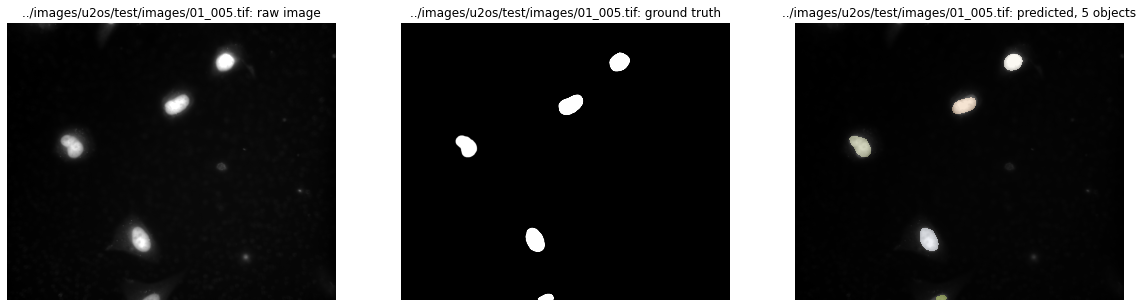

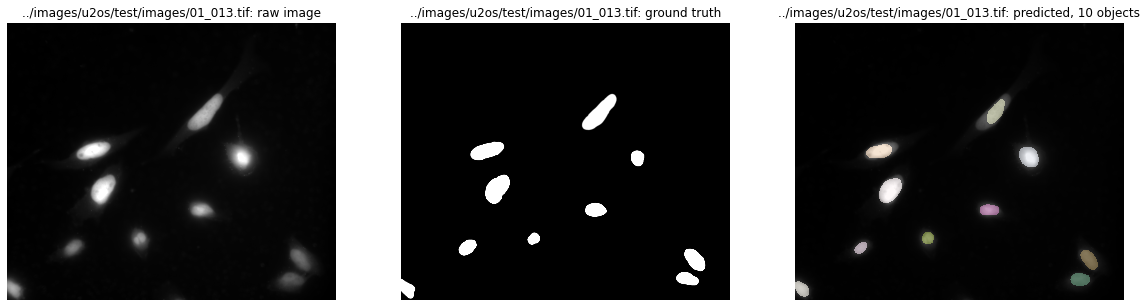

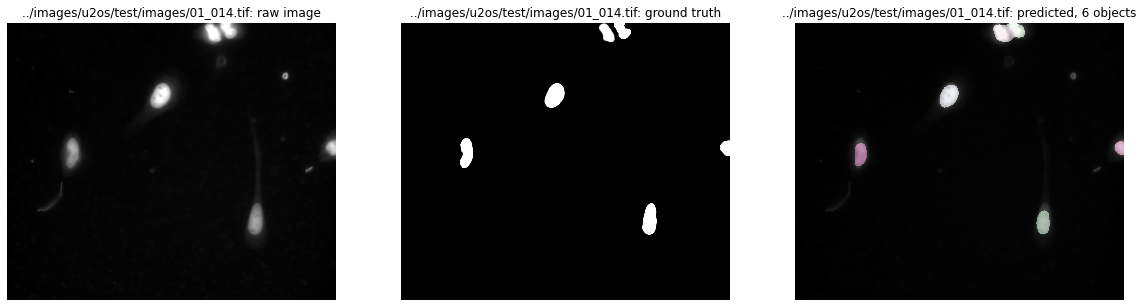

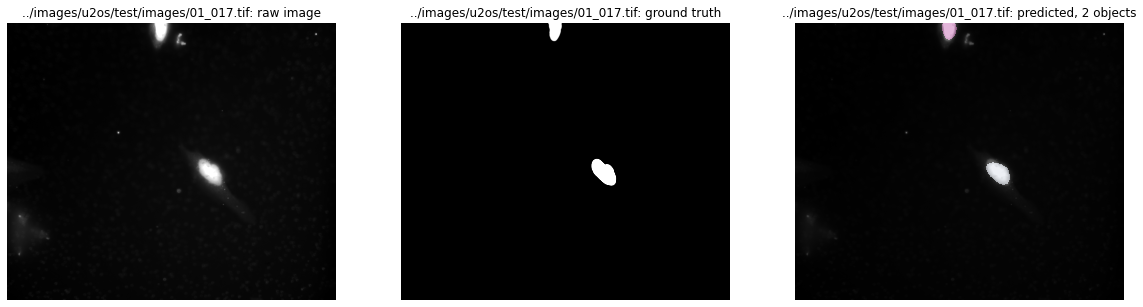

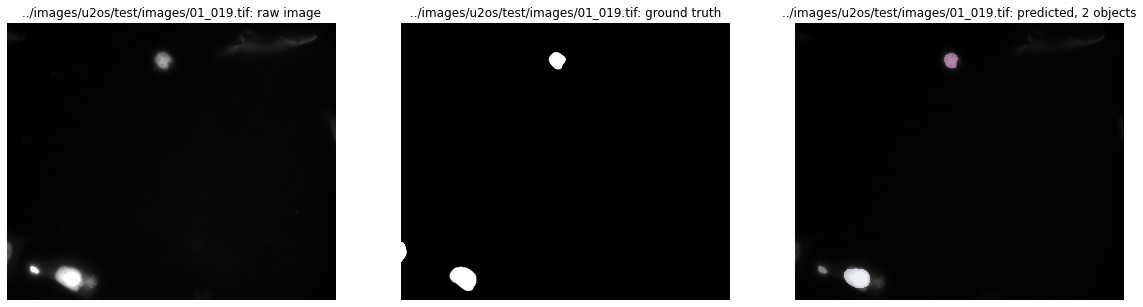

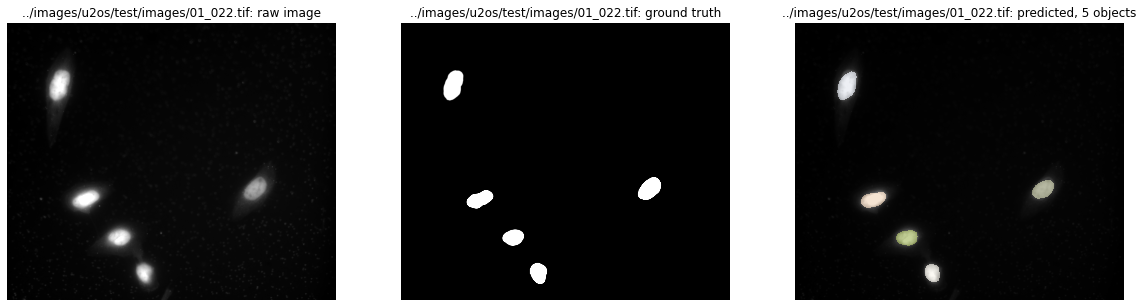

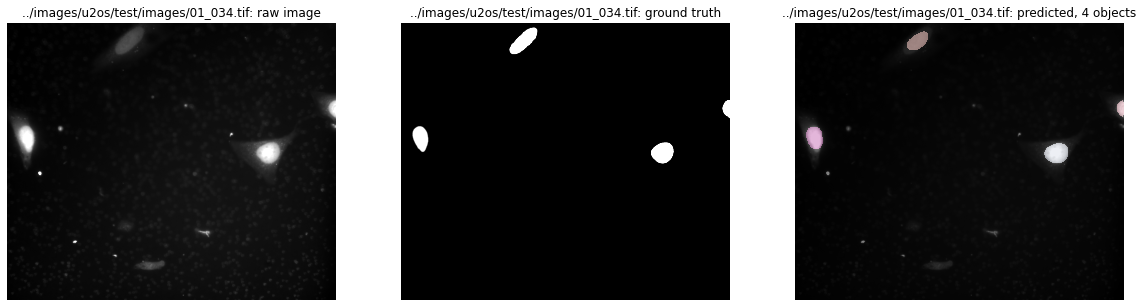

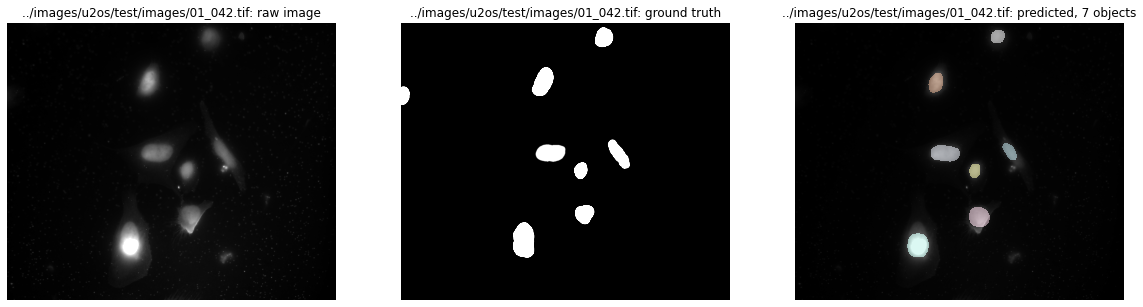

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, add5_Y_pred, merfish_X_test_names)

In [11]:
save_scores_csv(add5_stats, '_add5')

# 10 Images

In [12]:
# Load 10 additional images model from disk
add10_model = StarDist2D(None, name='2D_versatile_fluo_10', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.672384, nms_thresh=0.3.


In [13]:
add10_Y_pred = [add10_model.predict_instances(x, n_tiles=add10_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:57<00:00, 22.25s/it]


In [14]:
add10_Y_pred_labels = [pred[0] for pred in add10_Y_pred]
add10_stats = [matching_dataset(merfish_Y_test, add10_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:21<00:00,  2.39s/it]


In [15]:
add10_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=33, fn=10, precision=1.0, recall=0.7674418604651163, accuracy=0.7674418604651163, f1=0.868421052631579, n_true=43, n_pred=33, mean_true_score=0.6152790003857876, mean_matched_score=0.8017271823208748, panoptic_quality=0.6962367635944439, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=33, fn=10, precision=1.0, recall=0.7674418604651163, accuracy=0.7674418604651163, f1=0.868421052631579, n_true=43, n_pred=33, mean_true_score=0.6152790003857876, mean_matched_score=0.8017271823208748, panoptic_quality=0.6962367635944439, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=33, fn=10, precision=1.0, recall=0.7674418604651163, accuracy=0.7674418604651163, f1=0.868421052631579, n_true=43, n_pred=33, mean_true_score=0.6152790003857876, mean_matched_score=0.8017271823208748, panoptic_quality=0.6962367635944439, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=33, fn=10, prec

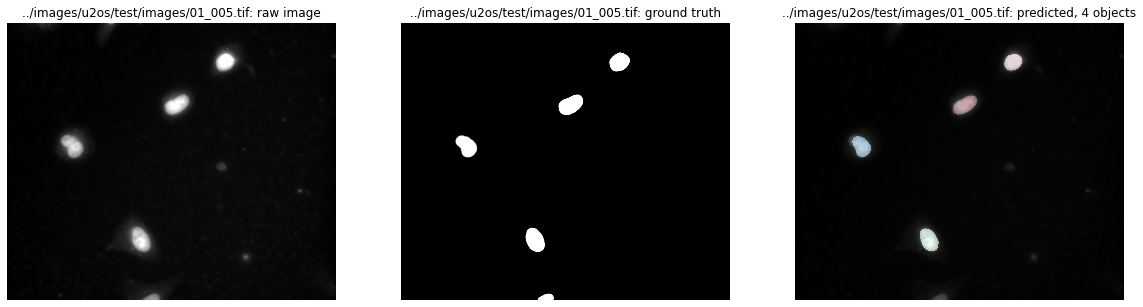

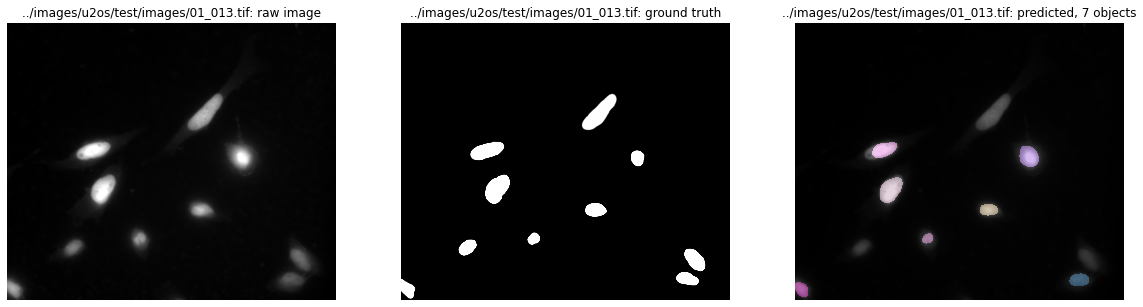

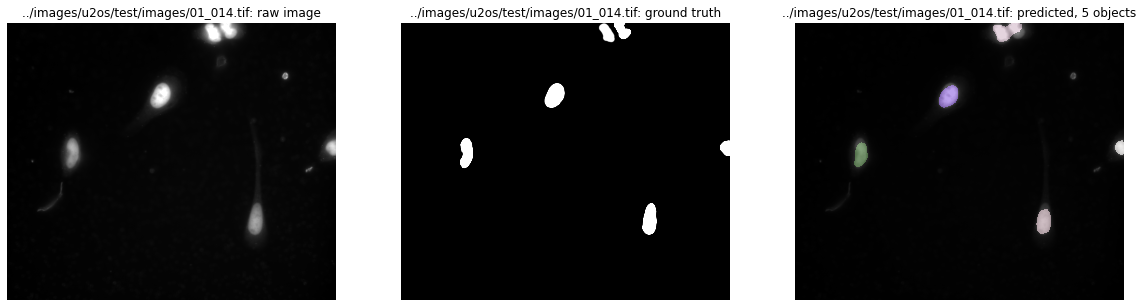

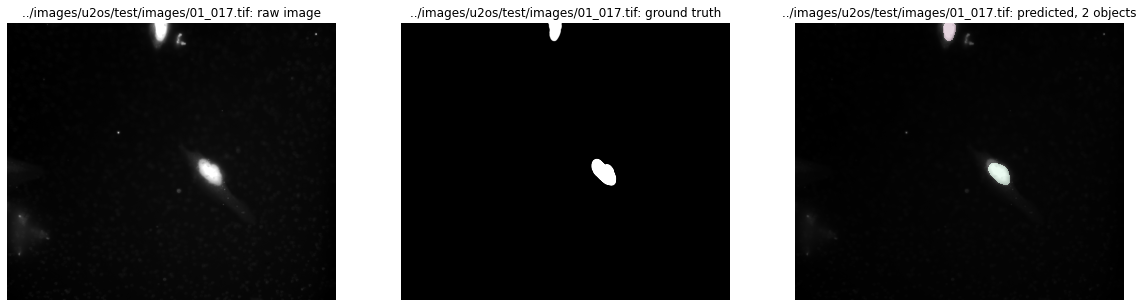

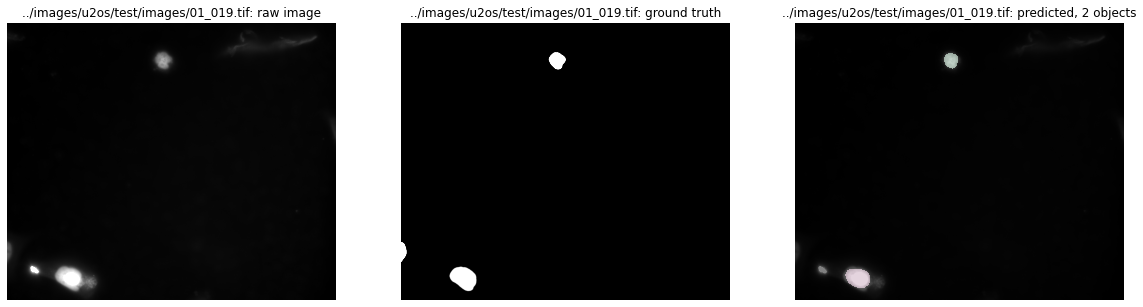

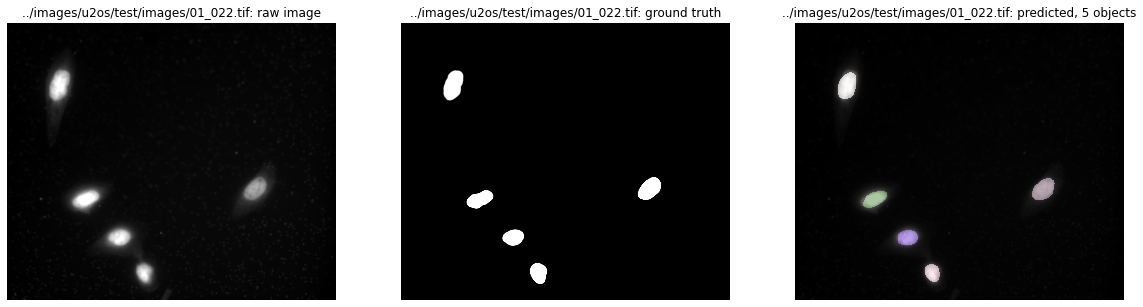

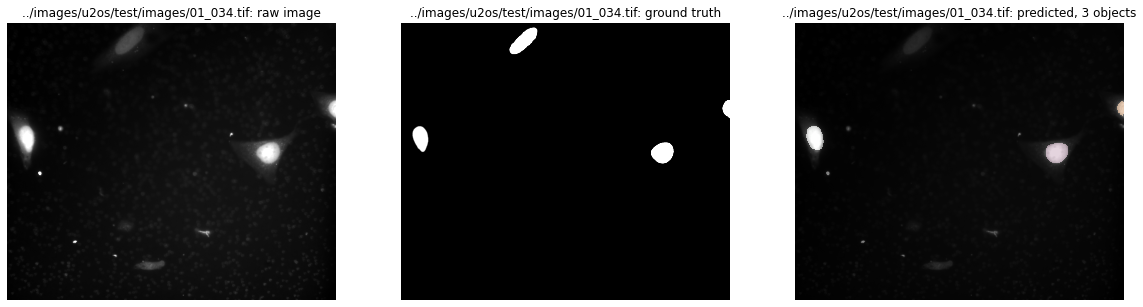

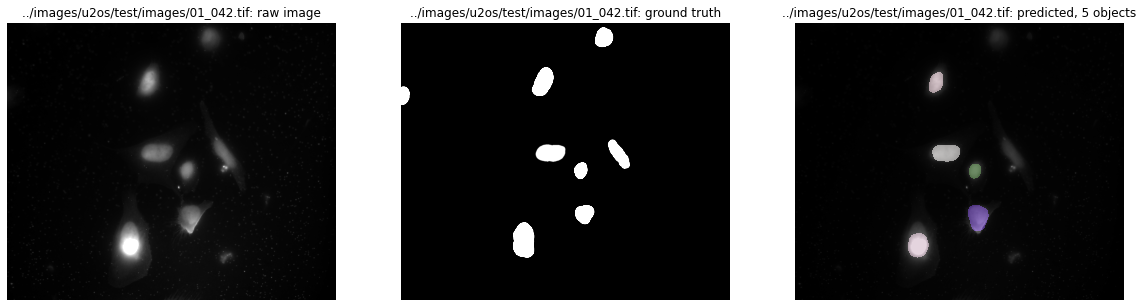

In [16]:
show_test_images(merfish_X_test, merfish_Y_test, add10_Y_pred, merfish_X_test_names)

In [17]:
save_scores_csv(add10_stats, '_add10')